# Chapter 5: Classification using Decision Trees and Rules -------------------

## Part 1: Decision Trees -------------------

## Understanding Decision Trees ----

In [1]:
# calculate entropy of a two-class segment
-0.60 * log2(0.60) - 0.40 * log2(0.40)

[1] 0.9709506

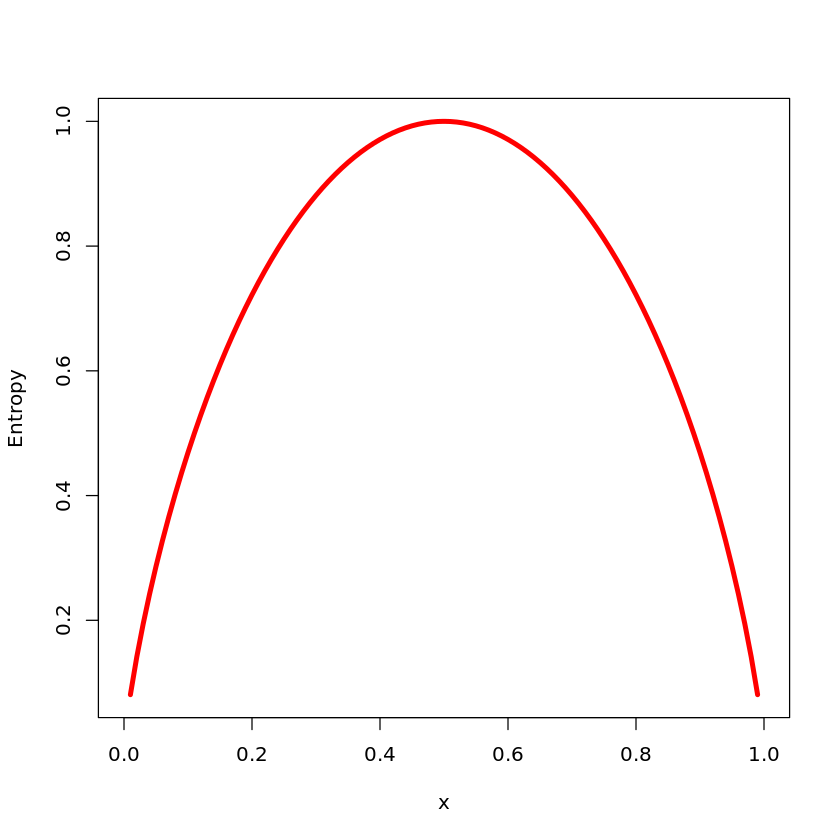

In [2]:
curve(-x * log2(x) - (1 - x) * log2(1 - x),
      col = "red", xlab = "x", ylab = "Entropy", lwd = 4)

## Example: Identifying Risky Bank Loans ----
## Step 2: Exploring and preparing the data ----

In [3]:
credit <- read.csv("credit.csv")
str(credit)

'data.frame':	1000 obs. of  17 variables:
 $ checking_balance    : Factor w/ 4 levels "< 0 DM","> 200 DM",..: 1 3 4 1 1 4 4 3 4 3 ...
 $ months_loan_duration: int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history      : Factor w/ 5 levels "critical","good",..: 1 2 1 2 4 2 2 2 2 1 ...
 $ purpose             : Factor w/ 6 levels "business","car",..: 5 5 4 5 2 4 5 2 5 2 ...
 $ amount              : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_balance     : Factor w/ 5 levels "< 100 DM","> 1000 DM",..: 5 1 1 1 1 5 4 1 2 1 ...
 $ employment_duration : Factor w/ 5 levels "< 1 year","> 7 years",..: 2 3 4 4 3 3 2 3 4 5 ...
 $ percent_of_income   : int  4 2 2 2 3 2 3 2 2 4 ...
 $ years_at_residence  : int  4 2 3 4 4 4 4 2 4 2 ...
 $ age                 : int  67 22 49 45 53 35 53 35 61 28 ...
 $ other_credit        : Factor w/ 3 levels "bank","none",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ housing             : Factor w/ 3 levels "other","own",..: 2 2 2 1 1 1 2 3 2 2 ...
 $ exi

In [4]:
# look at two characteristics of the applicant
table(credit$checking_balance)
table(credit$savings_balance)


    < 0 DM   > 200 DM 1 - 200 DM    unknown 
       274         63        269        394 


     < 100 DM     > 1000 DM  100 - 500 DM 500 - 1000 DM       unknown 
          603            48           103            63           183 

In [5]:
# look at two characteristics of the loan
summary(credit$months_loan_duration)
summary(credit$amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0    12.0    18.0    20.9    24.0    72.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    250    1366    2320    3271    3972   18424 

In [6]:
# look at the class variable
table(credit$default)


 no yes 
700 300 

In [7]:
# create a random sample for training and test data
# use set.seed to use the same random number sequence as the tutorial
set.seed(123)
train_sample <- sample(1000, 900)

In [8]:
str(train_sample)

 int [1:900] 288 788 409 881 937 46 525 887 548 453 ...


In [9]:
# split the data frames
credit_train <- credit[train_sample, ]
credit_test  <- credit[-train_sample, ]

In [10]:
# check the proportion of class variable
prop.table(table(credit_train$default))
prop.table(table(credit_test$default))


       no       yes 
0.7033333 0.2966667 


  no  yes 
0.67 0.33 

## Step 3: Training a model on the data ----

In [11]:
# install the C50 package
install.packages("C50")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [12]:
# build the simplest decision tree
library(C50)
credit_model <- C5.0(credit_train[-17], credit_train$default)

In [13]:
# display simple facts about the tree
credit_model


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default)

Classification Tree
Number of samples: 900 
Number of predictors: 16 

Tree size: 57 

Non-standard options: attempt to group attributes


In [14]:
# display detailed information about the tree
summary(credit_model)


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default)


C5.0 [Release 2.07 GPL Edition]  	Tue Jun 26 16:23:18 2018
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (17 attributes) from undefined.data

Decision tree:

checking_balance in {> 200 DM,unknown}: no (412/50)
checking_balance in {< 0 DM,1 - 200 DM}:
:...credit_history in {perfect,very good}: yes (59/18)
    credit_history in {critical,good,poor}:
    :...months_loan_duration <= 22:
        :...credit_history = critical: no (72/14)
        :   credit_history = poor:
        :   :...dependents > 1: no (5)
        :   :   dependents <= 1:
        :   :   :...years_at_residence <= 3: yes (4/1)
        :   :       years_at_residence > 3: no (5/1)
        :   credit_history = good:
        :   :...savings_balance in {> 1000 DM,500 - 1000 DM}: no (15/1)
        :       savings_balance = 100 - 500 DM:
        :       :...other_credit = bank: yes (3)
        :       :   other_credit

## Step 4: Evaluating model performance ----

In [15]:
# create a factor vector of predictions on test data
credit_pred <- predict(credit_model, credit_test)

In [16]:
# install the gmodels package
install.packages("gmodels")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [17]:
# cross tabulation of predicted versus actual classes
library(gmodels)
CrossTable(credit_test$default, credit_pred,
           prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE,
           dnn = c('actual default', 'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
            no |        59 |         8 |        67 | 
               |     0.590 |     0.080 |           | 
---------------|-----------|-----------|-----------|
           yes |        19 |        14 |        33 | 
               |     0.190 |     0.140 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        78 |        22 |       100 | 
---------------|-----------|-----------|-----------|

 


## Step 5: Improving model performance ----

### Boosting the accuracy of decision trees

In [18]:
credit_boost10 <- C5.0(credit_train[-17], credit_train$default,
                       trials = 10)
credit_boost10


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default, trials = 10)

Classification Tree
Number of samples: 900 
Number of predictors: 16 

Number of boosting iterations: 10 
Average tree size: 47.5 

Non-standard options: attempt to group attributes


In [19]:
summary(credit_boost10)


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Tue Jun 26 16:23:21 2018
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (17 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

checking_balance in {> 200 DM,unknown}: no (412/50)
checking_balance in {< 0 DM,1 - 200 DM}:
:...credit_history in {perfect,very good}: yes (59/18)
    credit_history in {critical,good,poor}:
    :...months_loan_duration <= 22:
        :...credit_history = critical: no (72/14)
        :   credit_history = poor:
        :   :...dependents > 1: no (5)
        :   :   dependents <= 1:
        :   :   :...years_at_residence <= 3: yes (4/1)
        :   :       years_at_residence > 3: no (5/1)
        :   credit_history = good:
        :   :...savings_balance in {> 1000 DM,500 - 1000 DM}: no (15/1)
        :       savings_balance = 100 - 500 DM:
        :       :...other_credit = bank: yes

In [20]:
credit_boost_pred10 <- predict(credit_boost10, credit_test)
CrossTable(credit_test$default, credit_boost_pred10,
           prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE,
           dnn = c('actual default', 'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
            no |        62 |         5 |        67 | 
               |     0.620 |     0.050 |           | 
---------------|-----------|-----------|-----------|
           yes |        13 |        20 |        33 | 
               |     0.130 |     0.200 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        75 |        25 |       100 | 
---------------|-----------|-----------|-----------|

 


### Making some mistakes more costly than others

In [21]:
# create dimensions for a cost matrix
matrix_dimensions <- list(c("no", "yes"), c("no", "yes"))
names(matrix_dimensions) <- c("predicted", "actual")
matrix_dimensions

$predicted
[1] "no"  "yes"

$actual
[1] "no"  "yes"

In [22]:
# build the matrix
error_cost <- matrix(c(0, 1, 4, 0), nrow = 2, dimnames = matrix_dimensions)
error_cost

,no,yes
no,0,4
yes,1,0


In [23]:
# apply the cost matrix to the tree
credit_cost <- C5.0(credit_train[-17], credit_train$default,
                          costs = error_cost)
credit_cost_pred <- predict(credit_cost, credit_test)

In [24]:
CrossTable(credit_test$default, credit_cost_pred,
           prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE,
           dnn = c('actual default', 'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
            no |        37 |        30 |        67 | 
               |     0.370 |     0.300 |           | 
---------------|-----------|-----------|-----------|
           yes |         7 |        26 |        33 | 
               |     0.070 |     0.260 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        44 |        56 |       100 | 
---------------|-----------|-----------|-----------|

 


## Part 2: Rule Learners -------------------

## Example: Identifying Poisonous Mushrooms ----
## Step 2: Exploring and preparing the data ----

In [25]:
mushrooms <- read.csv("mushrooms.csv", stringsAsFactors = TRUE)

In [26]:
# examine the structure of the data frame
str(mushrooms)

'data.frame':	8124 obs. of  23 variables:
 $ type                    : Factor w/ 2 levels "edible","poisonous": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap_shape               : Factor w/ 6 levels "bell","conical",..: 3 3 1 3 3 3 1 1 3 1 ...
 $ cap_surface             : Factor w/ 4 levels "fibrous","grooves",..: 4 4 4 3 4 3 4 3 3 4 ...
 $ cap_color               : Factor w/ 10 levels "brown","buff",..: 1 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "almond","anise",..: 8 1 2 8 7 1 1 2 8 1 ...
 $ gill_attachment         : Factor w/ 2 levels "attached","free": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill_spacing            : Factor w/ 2 levels "close","crowded": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill_size               : Factor w/ 2 levels "broad","narrow": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill_color              : Factor w/ 12 levels "black","brown",..: 1 1 2 2 1 2 5 2 8 5 ...
 $ stalk_shape             : Factor w/

In [27]:
# drop the veil_type feature
mushrooms$veil_type <- NULL

In [28]:
# examine the class distribution
table(mushrooms$type)


   edible poisonous 
     4208      3916 

## Step 3: Training a model on the data ----

In [ ]:
# install the RWeka package and have Java installed
install.packages("RWeka")

In [ ]:
library(RWeka)

In [ ]:
# train OneR() on the data
mushroom_1R <- OneR(type ~ ., data = mushrooms)

## Step 4: Evaluating model performance ----

In [ ]:
mushroom_1R

In [ ]:
summary(mushroom_1R)

## Step 5: Improving model performance ----

In [ ]:
mushroom_JRip <- JRip(type ~ ., data = mushrooms)
mushroom_JRip

In [ ]:
summary(mushroom_JRip)

In [30]:
# Rule Learner Using C5.0 Decision Trees (not in text)
library(C50)
mushroom_c5rules <- C5.0(type ~ odor + gill_size, data = mushrooms, rules = TRUE)
summary(mushroom_c5rules)


Call:
C5.0.formula(formula = type ~ odor + gill_size, data = mushrooms, rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Tue Jun 26 16:24:04 2018
-------------------------------

Class specified by attribute `outcome'

Read 8124 cases (3 attributes) from undefined.data

Rules:

Rule 1: (4328/120, lift 1.9)
	odor in {almond, anise, none}
	->  class edible  [0.972]

Rule 2: (3796, lift 2.1)
	odor in {creosote, fishy, foul, musty, pungent, spicy}
	->  class poisonous  [1.000]

Default class: edible


Evaluation on training data (8124 cases):

	        Rules     
	  ----------------
	    No      Errors

	     2  120( 1.5%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	  4208          (a): class edible
	   120  3796    (b): class poisonous


	Attribute usage:

	100.00%	odor


Time: 0.0 secs


### Notes
Part of the codes without cell output cannot be executed without a Java JVM installed.

If you have Java available on your machine and can execute the missing part, I will appreciate if you can share your Jupyter Notebook (.ipynb) with cell output at hdcydeng@gmail.com.